In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
wine = pd.read_csv('./Datasets/wine_dataset.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine['quality_label'] = wine.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [5]:
def gen_char(df, pred = None):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()]).T
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum() / obs) * 100
    skewness = df.skew()
    print('Data Shape: {}'.format(df.shape))
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness']
        out = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness], axis = 1)
    
    else:
        corr = df.corr()[pred]
        out = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, corr], axis = 1, sort = False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', corr_col]
    
    out.columns = cols
    d_types = out.types.value_counts()
    print('___________________________\nData types:\n', d_types)
    print('___________________________')
    return out

In [6]:
details = gen_char(wine, 'quality')
details

Data Shape: (6497, 14)
___________________________
Data types:
 float64    11
object      2
int64       1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,corr quality
fixed acidity,float64,6497,106,0,0.0,"[7.0, 6.3, 8.1, 7.2, 6.2, 8.6, 7.9, 6.6, 8.3, ...",1.723290,-0.076743
volatile acidity,float64,6497,187,0,0.0,"[0.27, 0.3, 0.28, 0.23, 0.32, 0.22, 0.18, 0.16...",1.495097,-0.265699
citric acid,float64,6497,89,0,0.0,"[0.36, 0.34, 0.4, 0.32, 0.16, 0.43, 0.41, 0.37...",0.471731,0.085532
residual sugar,float64,6497,316,0,0.0,"[20.7, 1.6, 6.9, 8.5, 7.0, 1.5, 1.45, 4.2, 1.2...",1.435404,-0.036980
chlorides,float64,6497,214,0,0.0,"[0.045, 0.049, 0.05, 0.058, 0.044, 0.033, 0.03...",5.399828,-0.200666
free sulfur dioxide,float64,6497,135,0,0.0,"[45.0, 14.0, 30.0, 47.0, 28.0, 11.0, 17.0, 16....",1.220066,0.055463
total sulfur dioxide,float64,6497,276,0,0.0,"[170.0, 132.0, 97.0, 186.0, 136.0, 129.0, 63.0...",-0.001177,-0.041385
density,float64,6497,998,0,0.0,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,...",0.503602,-0.305858
pH,float64,6497,108,0,0.0,"[3.0, 3.3, 3.26, 3.19, 3.18, 3.22, 2.99, 3.14,...",0.386839,0.019506
sulphates,float64,6497,111,0,0.0,"[0.45, 0.49, 0.44, 0.4, 0.47, 0.56, 0.53, 0.63...",1.797270,0.038485


In [7]:
lq = round(wine[wine['quality_label'] == 'low'][wine.columns].describe(), 2)
mq = round(wine[wine['quality_label'] == 'medium'][wine.columns].describe(), 2)
hq = round(wine[wine['quality_label'] == 'high'][wine.columns].describe(), 2)

pd.concat([lq, mq, hq], axis = 0, keys = ['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine                       \
                         75%     max               count    mean    std   min   
fixed acidity           7.80   15.90              3915.0    7.16   1.31  3.80   
volatile acidity        0.50    1.58              3915.0    0.31   0.14  0.08   
citric acid             0.40    1.00              3915.0    0.33   0.13  0.00   
residual sugar          8.52   23.50              3915.0    5.32   4.68  0.70   
chlorides               0.08    0.61              3915.0    0.05   0.03  0.01   
free sulfur dioxide    42.00  289.00              3915.0   30.96  16.33  1.00   
total sulfur dioxide  167.00  440.00              3915.0  113.51  53.57  6.00   
density                 1.00    1.00              3915.0    0.99   0.00  0.99   
pH                      3.31    3.90              3915.0    3.22   0.16  2.72   
sulphates               0.58    2.00              3915.0    0.54   0.15  0.22   
alcohol                10.40   14.90              3915.0   10.81   1.20  8.40   
quality                 5.00    5.00              3915.0    6.28   0.45  6.00   

                                                    High Quality Wine          \
                        25%     50%     75%     max             count    mean   
fixed acidity          6.40    6.90    7.60   15.60             198.0    6.85   
volatile acidity       0.21    0.27    0.36    1.04             198.0    0.29   
citric acid            0.26    0.31    0.39    1.66             198.0    0.33   
residual sugar         1.80    3.00    7.90   65.80             198.0    5.35   
chlorides              0.04    0.04    0.06    0.42             198.0    0.04   
free sulfur dioxide   19.00   29.00   41.00  112.00             198.0   34.51   
total sulfur dioxide  81.00  116.00  150.00  294.00             198.0  117.48   
density                0.99    0.99    1.00    1.04             198.0    0.99   
pH                     3.11    3.21    3.33    4.01             198.0    3.23   
sulphates              0.43    0.51    0.61    1.95             198.0    0.51   
alcohol                9.80   10.80   11.70   14.20             198.0   11.69   
quality                6.00    6.00    7.00    7.00             198.0    8.03   

                                                                   
                        std    min    25%     50%     75%     max  
fixed acidity          1.14   3.90   6.20    6.80    7.30   12.60  
volatile acidity       0.12   0.12   0.21    0.28    0.35    0.85  
citric acid            0.10   0.03   0.28    0.32    0.37    0.74  
residual sugar         4.16   0.80   2.00    4.05    7.57   14.80  
chlorides              0.02   0.01   0.03    0.04    0.04    0.12  
free sulfur dioxide   17.08   3.00  24.00   34.00   43.00  105.00  
total sulfur dioxide  41.69  12.00  96.00  118.50  145.00  212.50  
density                0.00   0.99   0.99    0.99    0.99   

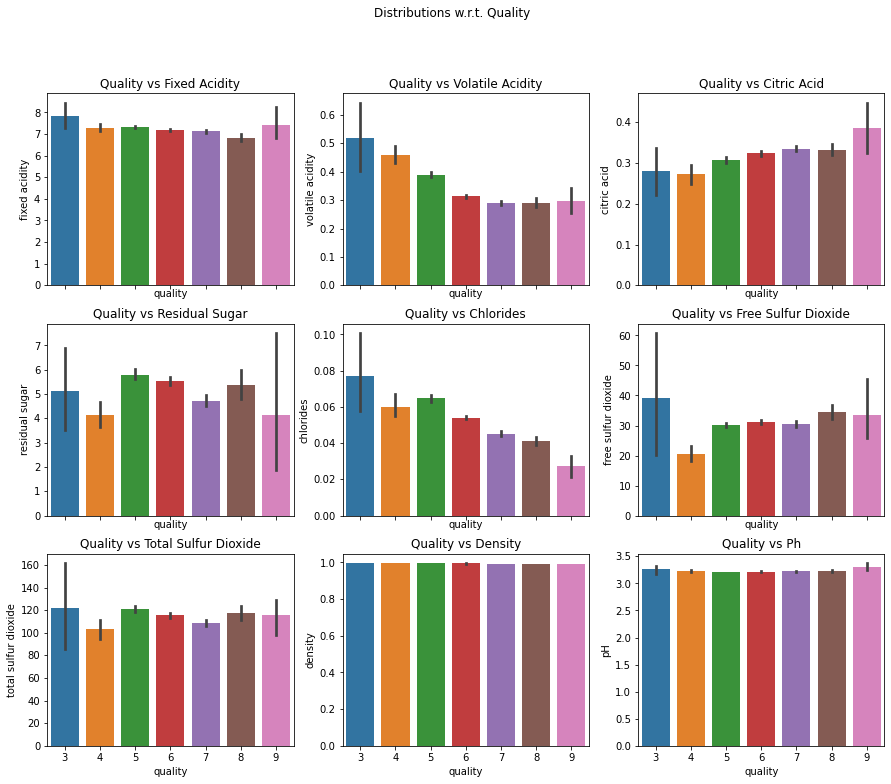

In [8]:
fig, axes = plt.subplots(3, 3, sharex = True, figsize = (15, 12))
fig.suptitle('Distributions w.r.t. Quality')
axes = axes.flatten()

for index, col in enumerate(wine.columns[:-5]):
    sns.barplot(x = 'quality', y = col, data = wine, ax = axes[index])
    axes[index].set_title('Quality vs {}'.format(col.title()))

In [9]:
wine = wine.sample(frac = 1, random_state = 23).reset_index(drop = True)

wine['type'] = wine['type'].map({'white': 1, 'red': 0})
wine['quality_label'] = wine['quality_label'].map({'low':0, 'medium': 1, 'high': 2})

<AxesSubplot:xlabel='quality_label', ylabel='count'>

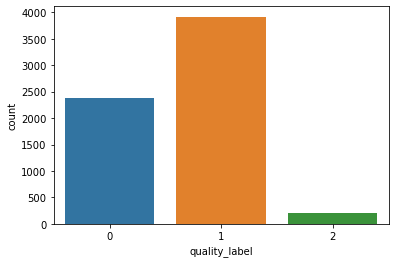

In [10]:
sns.countplot(wine['quality_label'])

In [11]:
X = wine.drop(['quality_label'], axis = 1)
y = wine['quality_label']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'SGD Classifier', 'SVM Linear']

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter=100),
    SVC(kernel='linear')
]

models = zip(names, classifiers)
models = list(models)

print(models)

[('K Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Logistic Regression', LogisticRegression()), ('SGD Classifier', SGDClassifier(max_iter=100)), ('SVM Linear', SVC(kernel='linear'))]


In [22]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Classification Report for {}:'.format(name))
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       485
           1       0.96      0.99      0.97       773
           2       1.00      0.69      0.82        42

    accuracy                           0.97      1300
   macro avg       0.98      0.88      0.92      1300
weighted avg       0.97      0.97      0.97      1300

Confusion Matrix:
[[465  20   0]
 [ 10 763   0]
 [  0  13  29]]


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00       773
           2       1.00      1.00      1.00        42

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

Confusion Matrix:
[[485   0   0]
 [  0 773   0]
 [  0   0  42]]


Classification Rep

In [23]:
X = wine.drop(['type'], axis = 1)
y = wine['type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Classification Report for {}:'.format(name))
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

Classification Report for K Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       298
           1       1.00      1.00      1.00      1002

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix:
[[295   3]
 [  4 998]]


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       298
           1       0.99      0.99      0.99      1002

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300

Confusion Matrix:
[[291   7]
 [ 12 990]]


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       298
           1       1.0